In [1]:
# Importing working tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA




# Load the dataset
file_path = r"C:\Users\HP\Downloads\SUPERSTORE..xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Superstores sales 2  (2)')

# Display the first few rows to check
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06 00:00:00,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**CLEANING THE DATASET**

In [2]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Convert 'Ship Date' to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

print(missing_values)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


Since we have 11 missing values under Postal codes, We will be filling those columns of 11 missing values with 0

In [4]:
# Fill missing postal codes with 0
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

In [5]:
# Convert 'Postal Code' to integer (if applicable)
df['Postal Code'] = df['Postal Code'].astype(int, errors='ignore')

In [6]:
# Checking for duplicates 
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
if not duplicate_rows.empty:
    print("Duplicate Rows Found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [7]:
# Dropping row ID because it's unecessary 
df = df.drop(columns=['Row ID'])

In [8]:
# Remove whitespace from the beginning and end of 'Customer Name' columns
df['Customer Name'] = df['Customer Name'].str.strip()

# Convert 'Customer name' names to title
df['Customer Name'] = df['Customer Name'].str.title()

**DISPLAYING THE CLEANED DATASET**

In [9]:
# Display the cleaned dataset information
print(df.info())

# Display the first few rows of the cleaned dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   int64         
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


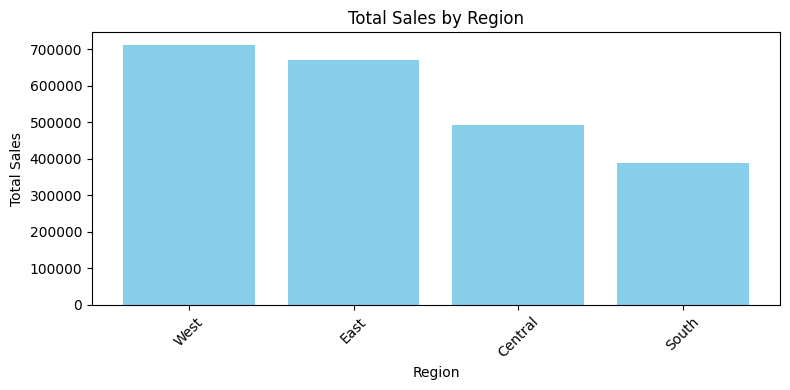

In [10]:
# Group by Region and calculate the total sales for each region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

# Sort by total sales in descending order
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)

# Visualize total sales by region using a bar chart
plt.figure(figsize=(8, 4))
plt.bar(sales_by_region['Region'], sales_by_region['Sales'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Extract the year from 'Order Date' and get unique years
unique_years = df['Order Date'].dt.year.unique()

# List the unique years in sorted order as regular Python integers
unique_years = sorted([int(year) for year in unique_years])
print(unique_years)

[2015, 2016, 2017, 2018]


**So we have year 2015, 2016, 2017 and 2018 we are working with** 

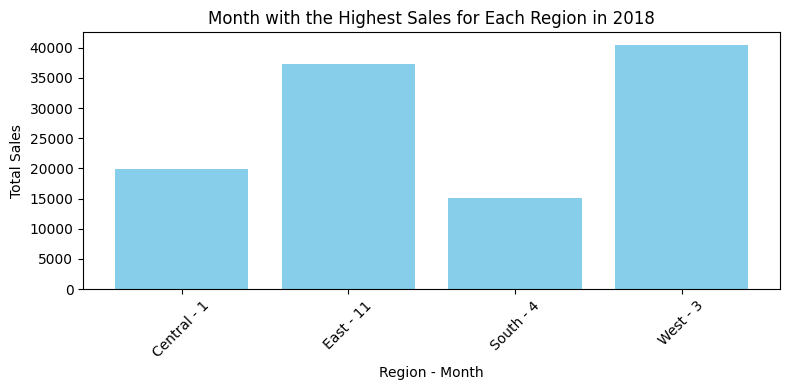

In [12]:
# Filter the data for the year 2018
df_2018 = df[df['Order Date'].dt.year == 2018].copy()  # I Used .copy() to avoid SettingWithCopyWarning

# Extract the month from 'Order Date'
df_2018.loc[:, 'Month'] = df_2018['Order Date'].dt.month  # I Used .loc[] to safely set the month

# Group by Region and Month, then calculate total sales for each group
sales_by_region_month = df_2018.groupby(['Region', 'Month'])['Sales'].sum().reset_index()

# Find the month with the highest sales for each region
highest_sales_by_region = sales_by_region_month.loc[sales_by_region_month.groupby('Region')['Sales'].idxmax()]

# Visualization
plt.figure(figsize=(8, 4))
plt.bar(highest_sales_by_region['Region'] + ' - ' + highest_sales_by_region['Month'].astype(str), 
        highest_sales_by_region['Sales'], color='skyblue')
plt.xlabel('Region - Month')
plt.ylabel('Total Sales')
plt.title('Month with the Highest Sales for Each Region in 2018')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**We are going to be performing months with the highest sales for each region by year**

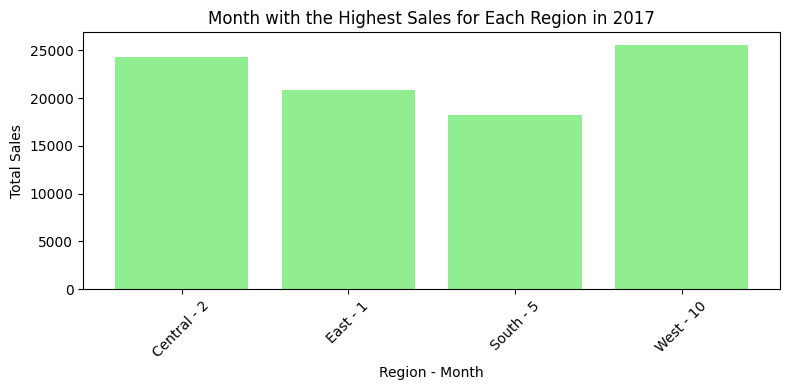

In [13]:
# Filter the data for the year 2017
df_2017 = df[df['Order Date'].dt.year == 2017].copy()  # I Used .copy() to avoid SettingWithCopyWarning

# Extract the month from 'Order Date'
df_2017.loc[:, 'Month'] = df_2017['Order Date'].dt.month  # I Used .loc[] to safely set the month

# Group by Region and Month, then calculate total sales for each group
sales_by_region_month_2017 = df_2017.groupby(['Region', 'Month'])['Sales'].sum().reset_index()

# Find the month with the highest sales for each region in 2017
highest_sales_by_region_2017 = sales_by_region_month_2017.loc[sales_by_region_month_2017.groupby('Region')['Sales'].idxmax()]

# Visualization for 2017
plt.figure(figsize=(8, 4))
plt.bar(highest_sales_by_region_2017['Region'] + ' - ' + highest_sales_by_region_2017['Month'].astype(str), 
        highest_sales_by_region_2017['Sales'], color='lightgreen')
plt.xlabel('Region - Month')
plt.ylabel('Total Sales')
plt.title('Month with the Highest Sales for Each Region in 2017')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

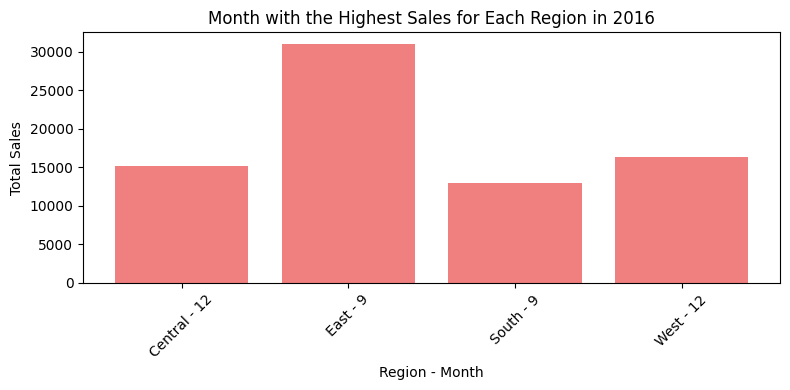

In [14]:
# Filter the data for the year 2016
df_2016 = df[df['Order Date'].dt.year == 2016].copy()  # I Used .copy() to avoid SettingWithCopyWarning

# Extract the month from 'Order Date'
df_2016.loc[:, 'Month'] = df_2016['Order Date'].dt.month  # I Used .loc[] to safely set the month

# Group by Region and Month, then calculate total sales for each group
sales_by_region_month_2016 = df_2016.groupby(['Region', 'Month'])['Sales'].sum().reset_index()

# Find the month with the highest sales for each region in 2016
highest_sales_by_region_2016 = sales_by_region_month_2016.loc[sales_by_region_month_2016.groupby('Region')['Sales'].idxmax()]

# Visualization for 2016
plt.figure(figsize=(8, 4))
plt.bar(highest_sales_by_region_2016['Region'] + ' - ' + highest_sales_by_region_2016['Month'].astype(str), 
        highest_sales_by_region_2016['Sales'], color='lightcoral')
plt.xlabel('Region - Month')
plt.ylabel('Total Sales')
plt.title('Month with the Highest Sales for Each Region in 2016')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

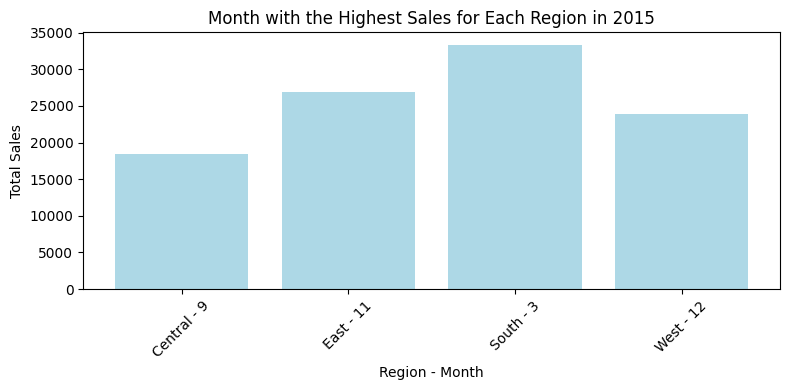

In [15]:
# Filter the data for the year 2015
df_2015 = df[df['Order Date'].dt.year == 2015].copy()  

# Extract the month from 'Order Date'
df_2015.loc[:, 'Month'] = df_2015['Order Date'].dt.month  

# Group by Region and Month, then calculate total sales for each group
sales_by_region_month_2015 = df_2015.groupby(['Region', 'Month'])['Sales'].sum().reset_index()

# Find the month with the highest sales for each region in 2015
highest_sales_by_region_2015 = sales_by_region_month_2015.loc[sales_by_region_month_2015.groupby('Region')['Sales'].idxmax()]

# Visualization for 2015
plt.figure(figsize=(8, 4))
plt.bar(highest_sales_by_region_2015['Region'] + ' - ' + highest_sales_by_region_2015['Month'].astype(str), 
        highest_sales_by_region_2015['Sales'], color='lightblue')
plt.xlabel('Region - Month')
plt.ylabel('Total Sales')
plt.title('Month with the Highest Sales for Each Region in 2015')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**I grouped total sales by sub-category**

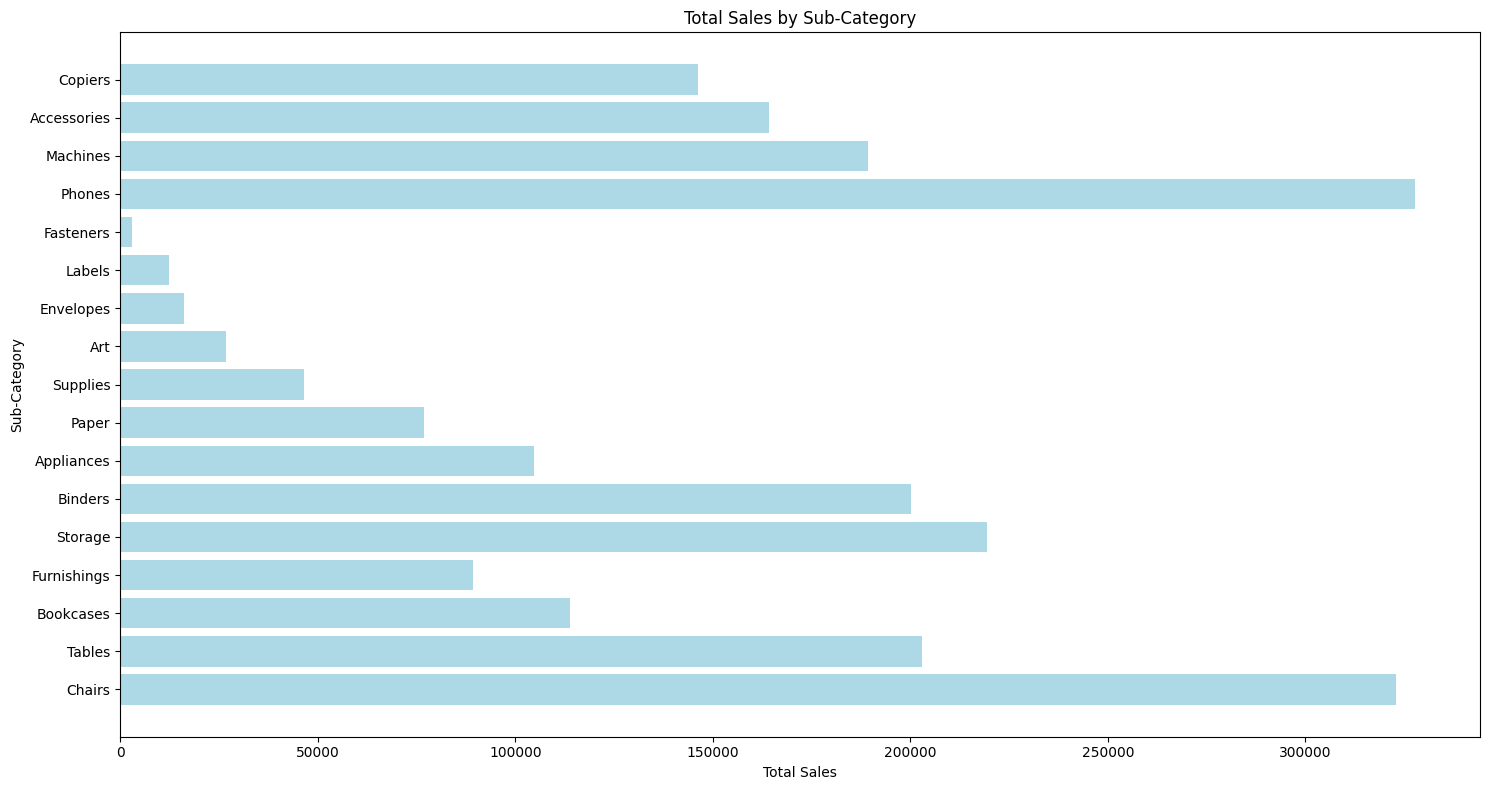

In [16]:
# Group by Category and Sub-Category and calculate total sales for each group
sales_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Sort by Category and then by Sales in descending order within each Category
sales_by_category_subcategory = sales_by_category_subcategory.sort_values(by=['Category', 'Sales'], ascending=[True, False])

# Plotting sales by category and sub-category
plt.figure(figsize=(15, 8))
plt.barh(sales_by_category_subcategory['Sub-Category'], sales_by_category_subcategory['Sales'], color='lightblue')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales by Sub-Category')
plt.tight_layout()
plt.show()

**We are going to be grouping sub category with the highest sale for each month by year**

,Month,Sub-Category,Sales
13,1,Phones,9380.100
29,2,Phones,8970.998
39,3,Copiers,21799.822
60,4,Machines,11198.965
78,5,Phones,6683.746
94,6,Phones,8181.794
111,7,Phones,12291.276
118,8,Binders,15263.570
136,9,Chairs,13649.450
154,10,Copiers,11199.968


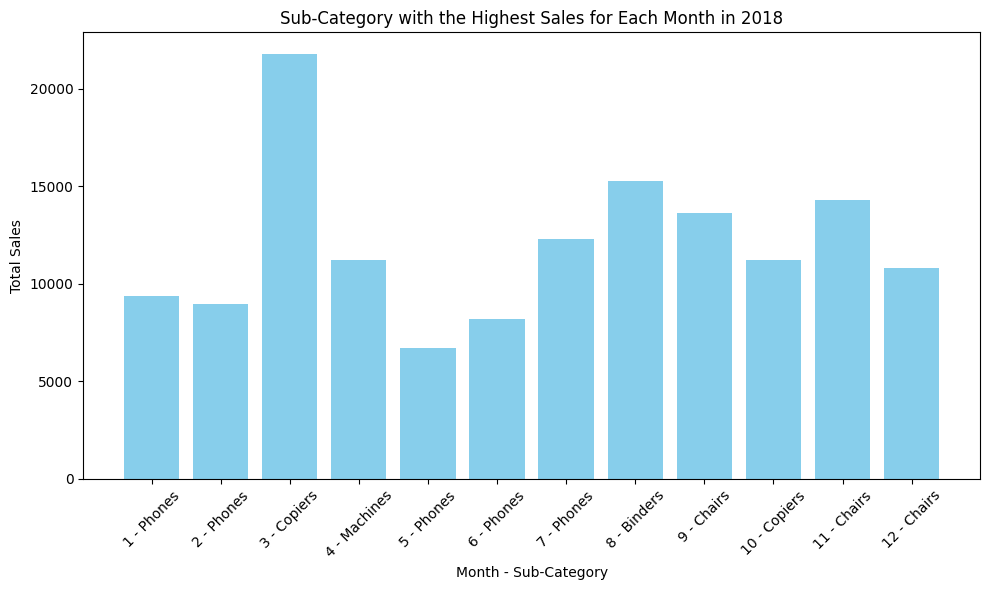

In [17]:
# Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract Year and Month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Filter data for the year 2018
df_2018 = df[df['Year'] == 2018].copy()

# Group by Month and Sub-Category, then calculate total sales for each group
sales_by_month_subcategory_2018 = df_2018.groupby(['Month', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each month in 2018
highest_sales_by_month_subcategory_2018 = sales_by_month_subcategory_2018.loc[
    sales_by_month_subcategory_2018.groupby('Month')['Sales'].idxmax()
]

# Display the results
from IPython.display import display
display(highest_sales_by_month_subcategory_2018)

# Visualization: Sub-Category with the Highest Sales for Each Month in 2018
plt.figure(figsize=(10, 6))
plt.bar(
    highest_sales_by_month_subcategory_2018['Month'].astype(str) + ' - ' + highest_sales_by_month_subcategory_2018['Sub-Category'],
    highest_sales_by_month_subcategory_2018['Sales'],
    color='skyblue'
)
plt.xlabel('Month - Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sub-Category with the Highest Sales for Each Month in 2018')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


,Month,Sub-Category,Sales
3,1,Binders,6130.384
23,2,Copiers,18499.930
48,3,Supplies,8868.012
61,4,Machines,11136.180
72,5,Chairs,10103.146
97,6,Phones,9759.944
106,7,Chairs,5874.688
130,8,Phones,8720.210
139,9,Chairs,8239.057
161,10,Phones,10730.944


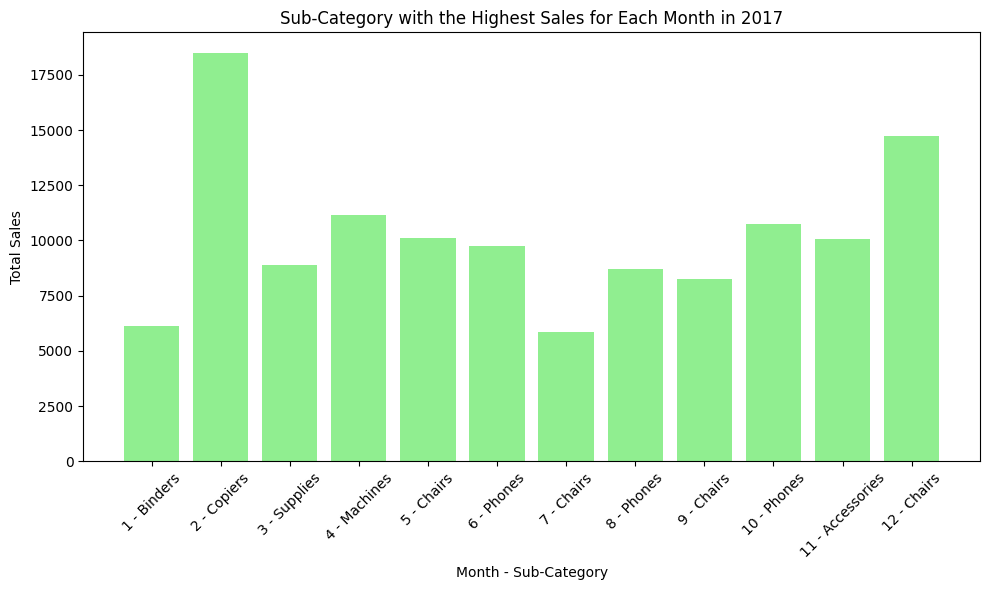

In [18]:
# Filter data for the year 2017
df_2017 = df[df['Year'] == 2017].copy()

# Group by Month and Sub-Category, then calculate total sales for each group
sales_by_month_subcategory_2017 = df_2017.groupby(['Month', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each month in 2017
highest_sales_by_month_subcategory_2017 = sales_by_month_subcategory_2017.loc[
    sales_by_month_subcategory_2017.groupby('Month')['Sales'].idxmax()
]

# Display the results
display(highest_sales_by_month_subcategory_2017)

# Visualization: Sub-Category with the Highest Sales for Each Month in 2017
plt.figure(figsize=(10, 6))
plt.bar(
    highest_sales_by_month_subcategory_2017['Month'].astype(str) + ' - ' + highest_sales_by_month_subcategory_2017['Sub-Category'],
    highest_sales_by_month_subcategory_2017['Sales'],
    color='lightgreen'
)
plt.xlabel('Month - Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sub-Category with the Highest Sales for Each Month in 2017')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Month,Sub-Category,Sales
5,1,Chairs,8644.022
21,2,Chairs,4183.868
34,3,Binders,7947.493
61,4,Phones,9211.848
70,5,Chairs,8237.748
83,6,Binders,5003.572
100,7,Chairs,6793.952
123,8,Phones,8980.182
140,9,Phones,11979.670
149,10,Chairs,6582.104


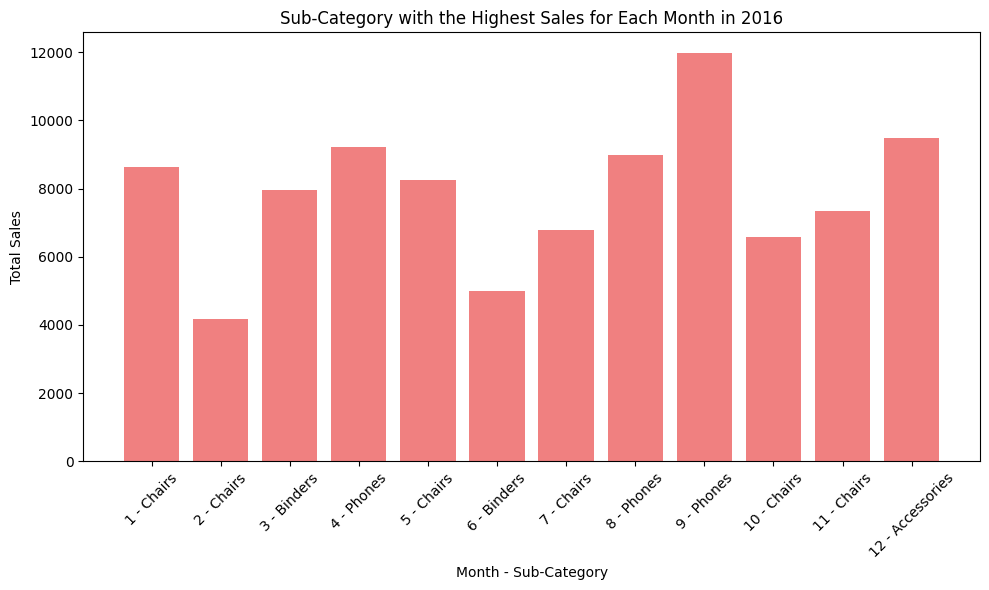

In [19]:
# Filter data for the year 2016
df_2016 = df[df['Year'] == 2016].copy()

# Group by Month and Sub-Category, then calculate total sales for each group
sales_by_month_subcategory_2016 = df_2016.groupby(['Month', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each month in 2016
highest_sales_by_month_subcategory_2016 = sales_by_month_subcategory_2016.loc[
    sales_by_month_subcategory_2016.groupby('Month')['Sales'].idxmax()
]

# Display the results
display(highest_sales_by_month_subcategory_2016)

# Visualization: Sub-Category with the Highest Sales for Each Month in 2016
plt.figure(figsize=(10, 6))
plt.bar(
    highest_sales_by_month_subcategory_2016['Month'].astype(str) + ' - ' + highest_sales_by_month_subcategory_2016['Sub-Category'],
    highest_sales_by_month_subcategory_2016['Sales'],
    color='lightcoral'
)
plt.xlabel('Month - Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sub-Category with the Highest Sales for Each Month in 2016')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Month,Sub-Category,Sales
5,1,Chairs,9461.292
28,2,Phones,2871.764
41,3,Machines,25314.658
57,4,Machines,4727.916
74,5,Phones,4877.690
83,6,Chairs,6750.537
109,7,Supplies,8311.942
122,8,Machines,8369.922
139,9,Machines,13021.120
158,10,Phones,9580.922


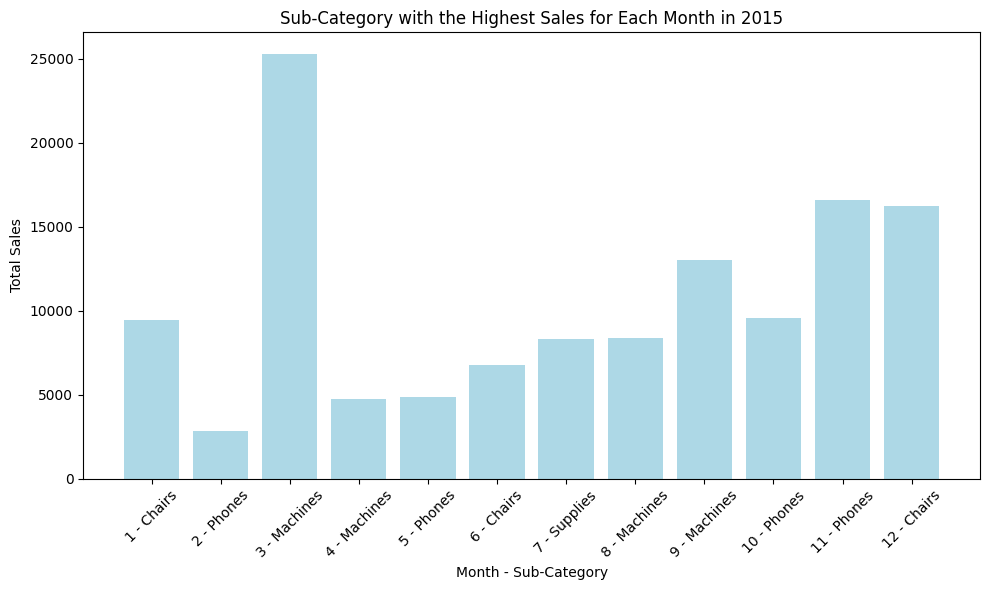

In [20]:
# Filter data for the year 2015
df_2015 = df[df['Year'] == 2015].copy()

# Group by Month and Sub-Category, then calculate total sales for each group
sales_by_month_subcategory_2015 = df_2015.groupby(['Month', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each month in 2015
highest_sales_by_month_subcategory_2015 = sales_by_month_subcategory_2015.loc[
    sales_by_month_subcategory_2015.groupby('Month')['Sales'].idxmax()
]

# Display the results
display(highest_sales_by_month_subcategory_2015)

# Visualization: Sub-Category with the Highest Sales for Each Month in 2015
plt.figure(figsize=(10, 6))
plt.bar(
    highest_sales_by_month_subcategory_2015['Month'].astype(str) + ' - ' + highest_sales_by_month_subcategory_2015['Sub-Category'],
    highest_sales_by_month_subcategory_2015['Sales'],
    color='lightblue'
)
plt.xlabel('Month - Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sub-Category with the Highest Sales for Each Month in 2015')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**We are going to be grouping sub-Category with the highest sale for each region by year**

,Region,Sub-Category,Sales
5,Central,Chairs,82372.776
30,East,Phones,99884.662
47,South,Phones,58098.338
56,West,Chairs,100023.200


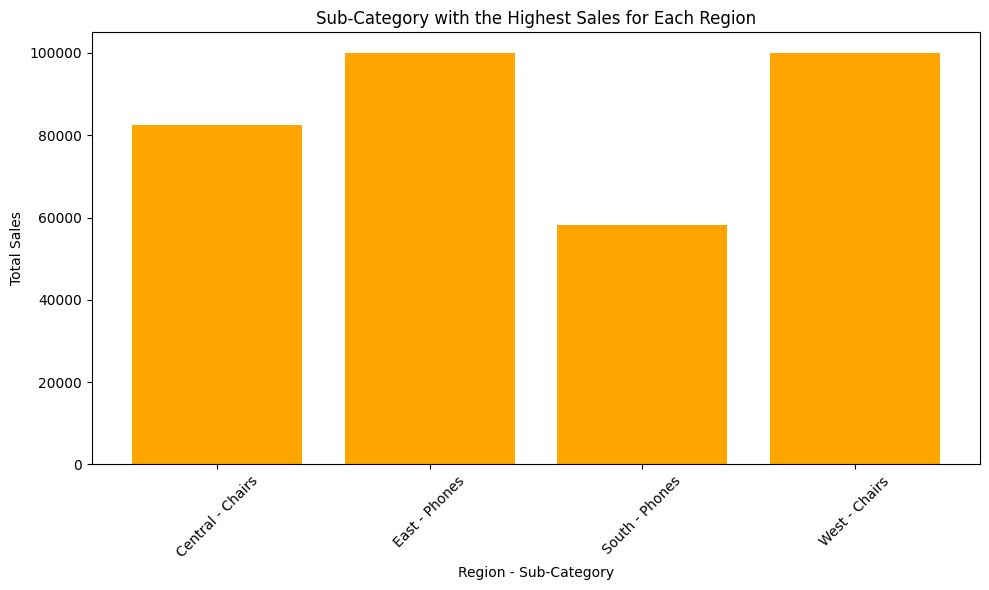

In [21]:
# Group by Region and Sub-Category, then calculate total sales for each group
sales_by_region_subcategory = df.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each region
highest_sales_by_region_subcategory = sales_by_region_subcategory.loc[
    sales_by_region_subcategory.groupby('Region')['Sales'].idxmax()
]

# Display the results
display(highest_sales_by_region_subcategory)

# Visualization: Sub-Category with the Highest Sales for Each Region
plt.figure(figsize=(10, 6))
plt.bar(
    highest_sales_by_region_subcategory['Region'] + ' - ' + highest_sales_by_region_subcategory['Sub-Category'],
    highest_sales_by_region_subcategory['Sales'],
    color='orange'
)
plt.xlabel('Region - Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sub-Category with the Highest Sales for Each Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Region,Sub-Category,Sales
13,Central,Phones,23143.356
30,East,Phones,35952.188
47,South,Phones,21157.170
57,West,Copiers,29459.676


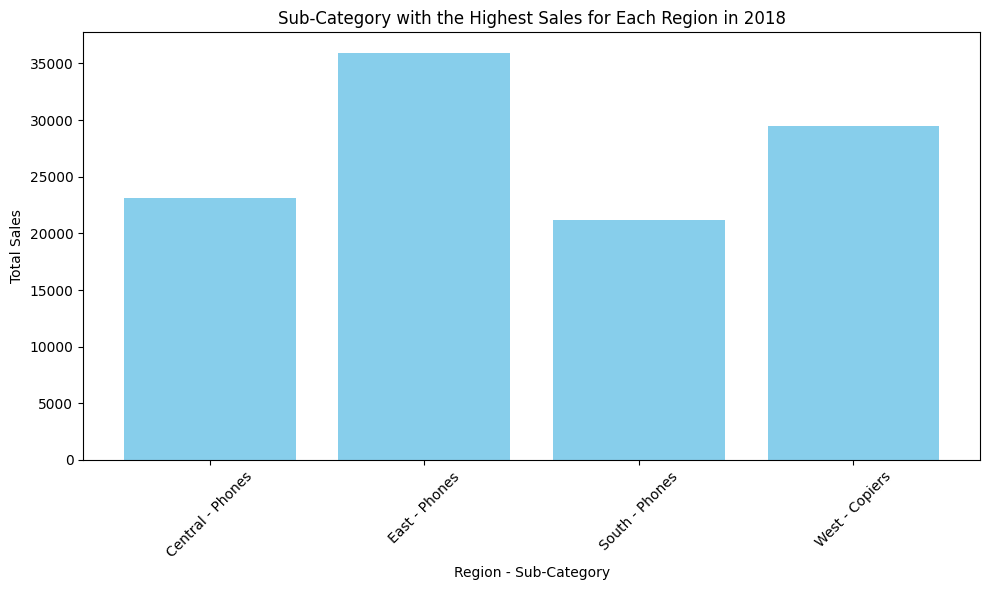

In [22]:
# Filter data for the year 2018
df_2018 = df[df['Year'] == 2018].copy()

# Group by Region and Sub-Category, then calculate total sales for each group for 2018
sales_by_region_subcategory_2018 = df_2018.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each region in 2018
highest_sales_by_region_subcategory_2018 = sales_by_region_subcategory_2018.loc[
    sales_by_region_subcategory_2018.groupby('Region')['Sales'].idxmax()
]

# Display the results
display(highest_sales_by_region_subcategory_2018)

# Visualization: Sub-Category with the Highest Sales for Each Region in 2018
plt.figure(figsize=(10, 6))
plt.bar(
    highest_sales_by_region_subcategory_2018['Region'] + ' - ' + highest_sales_by_region_subcategory_2018['Sub-Category'],
    highest_sales_by_region_subcategory_2018['Sales'],
    color='skyblue'
)
plt.xlabel('Region - Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sub-Category with the Highest Sales for Each Region in 2018')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Region,Sub-Category,Sales
5,Central,Chairs,22417.634
28,East,Machines,25215.938
45,South,Machines,13238.600
56,West,Chairs,30744.280


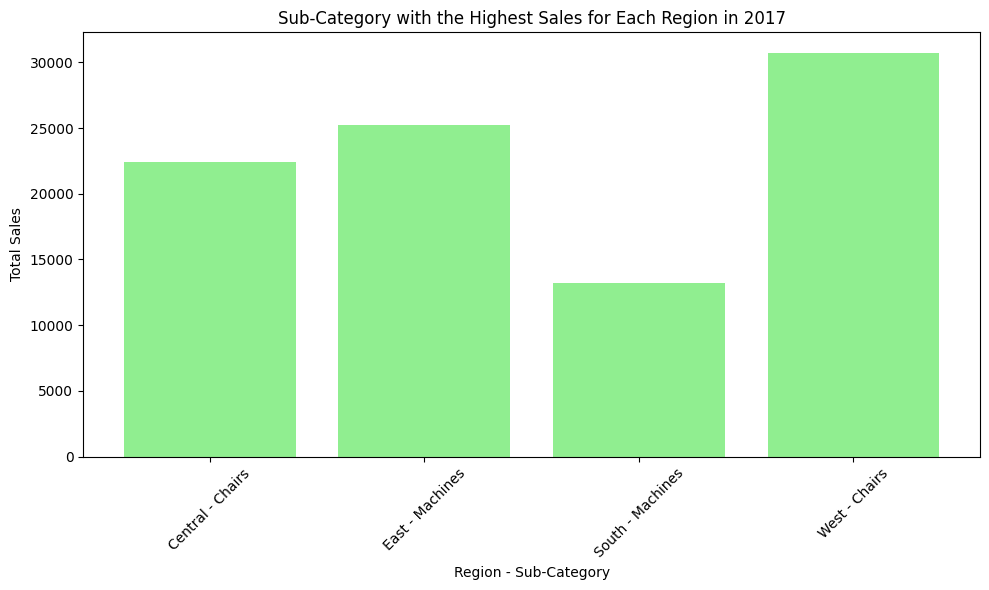

In [23]:
# Filter data for the year 2017
df_2017 = df[df['Year'] == 2017].copy()

# Group by Region and Sub-Category, then calculate total sales for each group for 2017
sales_by_region_subcategory_2017 = df_2017.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each region in 2017
highest_sales_by_region_subcategory_2017 = sales_by_region_subcategory_2017.loc[
    sales_by_region_subcategory_2017.groupby('Region')['Sales'].idxmax()
]

# Display the results
display(highest_sales_by_region_subcategory_2017)

# Visualization: Sub-Category with the Highest Sales for Each Region in 2017
plt.figure(figsize=(10, 6))
plt.bar(
    highest_sales_by_region_subcategory_2017['Region'] + ' - ' + highest_sales_by_region_subcategory_2017['Sub-Category'],
    highest_sales_by_region_subcategory_2017['Sales'],
    color='lightgreen'
)
plt.xlabel('Region - Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sub-Category with the Highest Sales for Each Region in 2017')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Region,Sub-Category,Sales
13,Central,Phones,19363.922
30,East,Phones,22118.318
37,South,Binders,13329.493
56,West,Chairs,22620.160


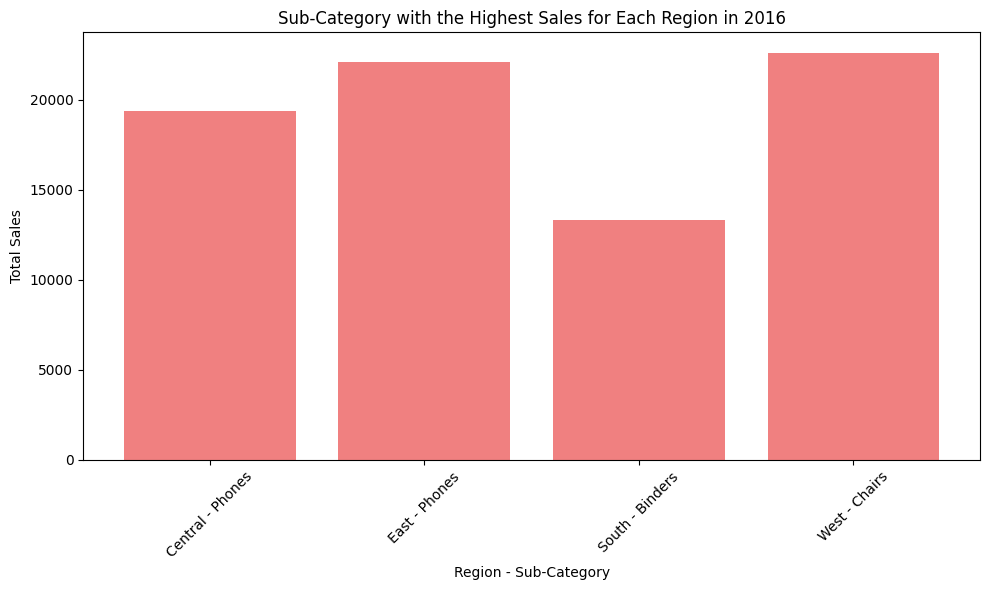

In [24]:
# Filter data for the year 2016
df_2016 = df[df['Year'] == 2016].copy()

# Group by Region and Sub-Category, then calculate total sales for each group for 2016
sales_by_region_subcategory_2016 = df_2016.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each region in 2016
highest_sales_by_region_subcategory_2016 = sales_by_region_subcategory_2016.loc[
    sales_by_region_subcategory_2016.groupby('Region')['Sales'].idxmax()
]

# Display the result
display(highest_sales_by_region_subcategory_2016)

# Visualization: Sub-Category with the Highest Sales for Each Region in 2016
plt.figure(figsize=(10, 6))
plt.bar(
    highest_sales_by_region_subcategory_2016['Region'] + ' - ' + highest_sales_by_region_subcategory_2016['Sub-Category'],
    highest_sales_by_region_subcategory_2016['Sales'],
    color='lightcoral'
)
plt.xlabel('Region - Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sub-Category with the Highest Sales for Each Region in 2016')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Region,Sub-Category,Sales
5,Central,Chairs,20754.052
22,East,Chairs,22008.268
45,South,Machines,27594.725
64,West,Phones,29527.440


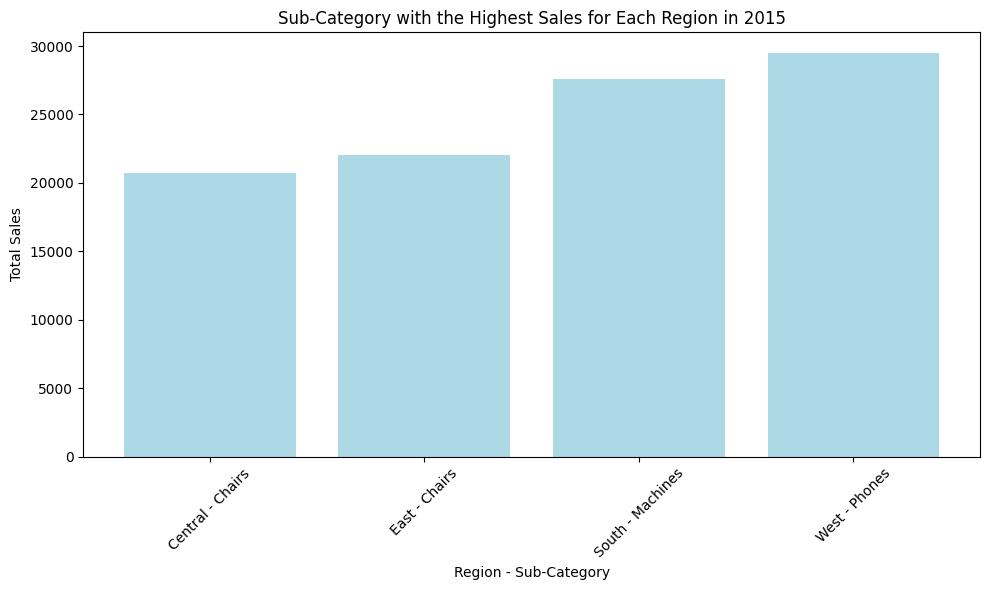

In [25]:
# Filter data for the year 2015
df_2015 = df[df['Year'] == 2015].copy()

# Group by Region and Sub-Category, then calculate total sales for each group for 2015
sales_by_region_subcategory_2015 = df_2015.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each region in 2015
highest_sales_by_region_subcategory_2015 = sales_by_region_subcategory_2015.loc[
    sales_by_region_subcategory_2015.groupby('Region')['Sales'].idxmax()
]

# Display the result
display(highest_sales_by_region_subcategory_2015)

# Visualization: Sub-Category with the Highest Sales for Each Region in 2015
plt.figure(figsize=(10, 6))
plt.bar(
    highest_sales_by_region_subcategory_2015['Region'] + ' - ' + highest_sales_by_region_subcategory_2015['Sub-Category'],
    highest_sales_by_region_subcategory_2015['Sales'],
    color='lightblue'
)
plt.xlabel('Region - Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sub-Category with the Highest Sales for Each Region in 2015')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**We are going to be grouping by top 10 customers with the highest sales**

,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072


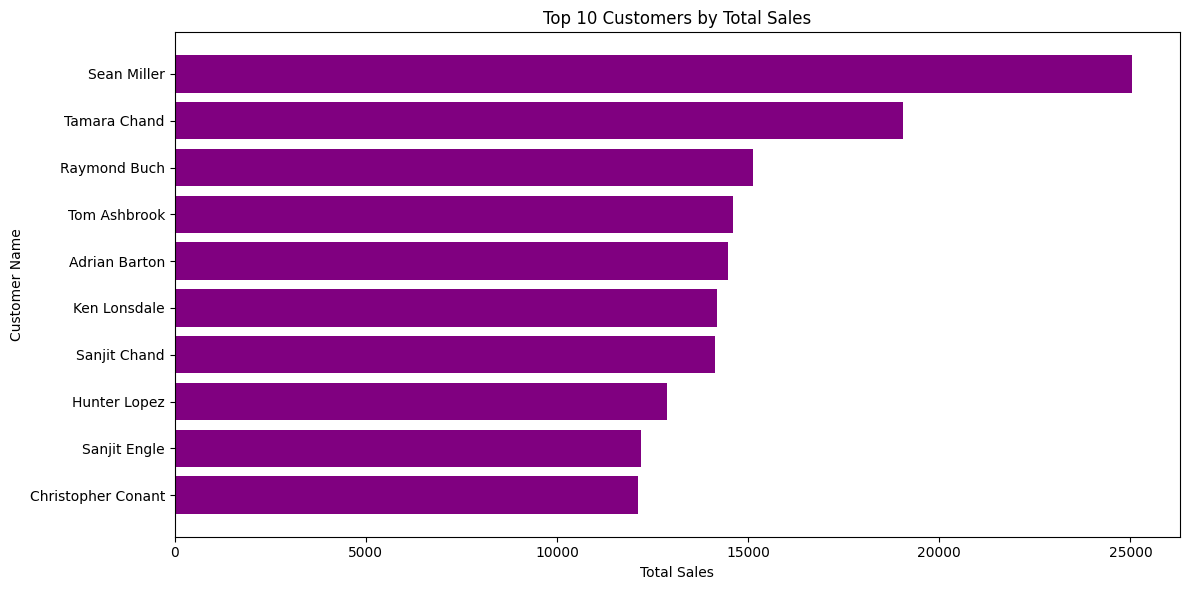

In [26]:
# Group by Customer Name and calculate the total sales for each customer
sales_by_customer = df.groupby('Customer Name')['Sales'].sum().reset_index()

# Sort the customers by total sales in descending order
top_customers = sales_by_customer.sort_values(by='Sales', ascending=False)

# Display the top customers
display(top_customers.head(10))

# Visualization: Top 10 Customers by Total Sales
plt.figure(figsize=(12, 6))
plt.barh(top_customers.head(10)['Customer Name'], top_customers.head(10)['Sales'], color='purple')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Total Sales')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales on top
plt.tight_layout()
plt.show()

**We will be grouping it by top 10 sub category with the higest sale for each to 10 customers**

,Customer Name,Sub-Category,Sales
2,Adrian Barton,Binders,11068.910
11,Christopher Conant,Copiers,11199.936
17,Hunter Lopez,Copiers,10499.970
32,Ken Lonsdale,Supplies,8187.650
38,Raymond Buch,Copiers,13999.960
46,Sanjit Chand,Binders,11468.166
60,Sanjit Engle,Machines,8749.950
70,Sean Miller,Machines,23459.780
77,Tamara Chand,Copiers,17499.950
84,Tom Ashbrook,Copiers,11199.968


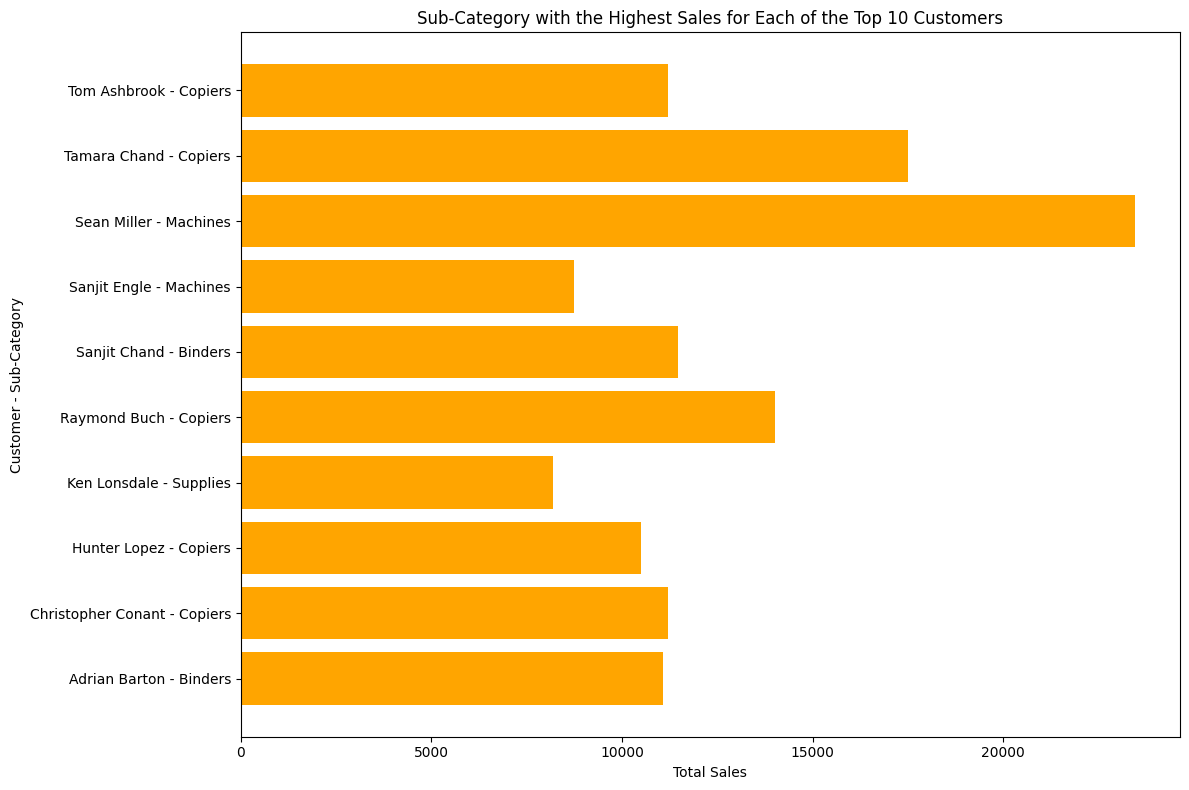

In [27]:
# Group by Customer Name and calculate the total sales for each customer
sales_by_customer = df.groupby('Customer Name')['Sales'].sum().reset_index()

# Sort the customers by total sales in descending order and select the top 10
top_customers = sales_by_customer.sort_values(by='Sales', ascending=False).head(10)

# Filter the original data to include only the top 10 customers
top_customers_data = df[df['Customer Name'].isin(top_customers['Customer Name'])]

# Group by Customer Name and Sub-Category to get the sub-categories bought by the top 10 customers
subcategory_sales_by_top_customers = top_customers_data.groupby(['Customer Name', 'Sub-Category'])['Sales'].sum().reset_index()

# Find the sub-category with the highest sales for each of the top 10 customers
highest_subcategory_sales_by_top_customers = subcategory_sales_by_top_customers.loc[
    subcategory_sales_by_top_customers.groupby('Customer Name')['Sales'].idxmax()
]

# Display the result
display(highest_subcategory_sales_by_top_customers)

# Visualization: Sub-Category with the Highest Sales for Each of the Top 10 Customers
plt.figure(figsize=(12, 8))
plt.barh(
    highest_subcategory_sales_by_top_customers['Customer Name'] + ' - ' + highest_subcategory_sales_by_top_customers['Sub-Category'],
    highest_subcategory_sales_by_top_customers['Sales'],
    color='orange'
)
plt.xlabel('Total Sales')
plt.ylabel('Customer - Sub-Category')
plt.title('Sub-Category with the Highest Sales for Each of the Top 10 Customers')
plt.tight_layout()
plt.show()

**Over here we performed monthly sales over time and Yearly sales trend**

,Year,Month,Total Sales
0,2015,1,28828.2540
1,2015,2,12588.4840
2,2015,3,54027.6920
3,2015,4,24710.0160
4,2015,5,29520.4900
5,2015,6,29181.3346
6,2015,7,35194.5580
7,2015,8,37349.2655
8,2015,9,65956.3998
9,2015,10,34561.9470


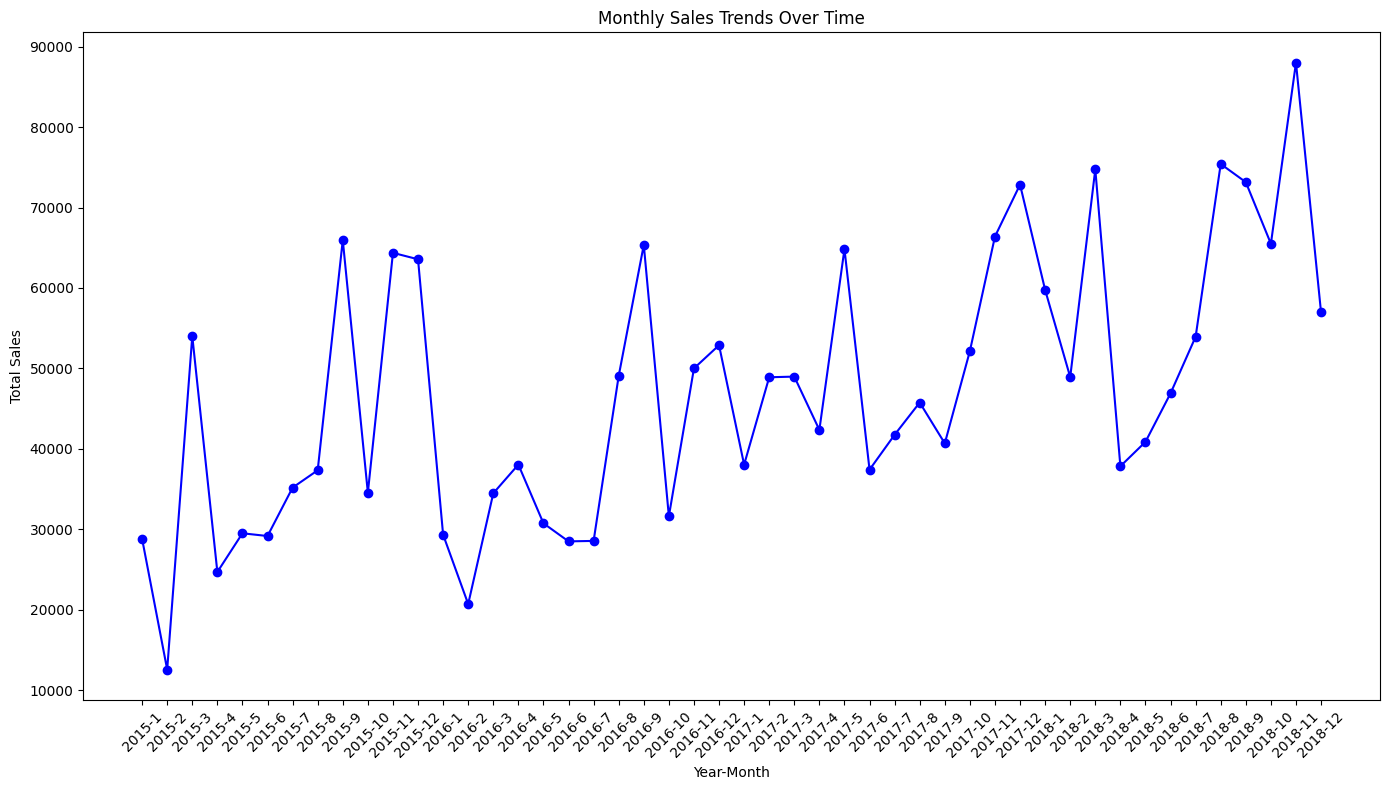

,Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


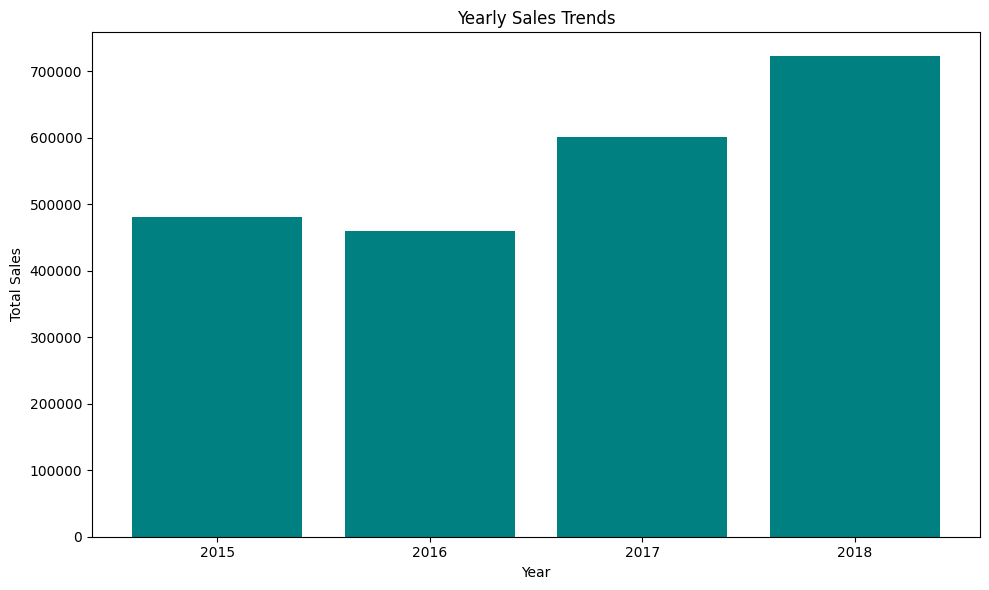

In [28]:
# Extract Year and Month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by Year and Month to calculate total sales for each month
sales_over_time = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
sales_over_time.columns = ['Year', 'Month', 'Total Sales']

# Display the result in Jupyter Notebook
display(sales_over_time)

# Visualization: Sales Trends Over Time
plt.figure(figsize=(14, 8))

# Create a time series line plot for monthly sales over the years
plt.plot(
    sales_over_time['Year'].astype(str) + '-' + sales_over_time['Month'].astype(str),
    sales_over_time['Total Sales'], marker='o', linestyle='-', color='b'
)

plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by Year to calculate total yearly sales
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
yearly_sales.columns = ['Year', 'Total Sales']

# Display the result for yearly sales
display(yearly_sales)

# Visualization: Yearly Sales Trends
plt.figure(figsize=(10, 6))

# Create a bar plot for yearly sales
plt.bar(yearly_sales['Year'].astype(str), yearly_sales['Total Sales'], color='teal')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trends')
plt.tight_layout()
plt.show()

**Over here we performed distribution of rfm score**

,Customer ID,Order Date,Recency,Frequency,Monetary
0,AA-10315,2018-06-29,184,5,5563.560
1,AA-10375,2018-11-12,48,9,1056.390
2,AA-10480,2018-04-15,259,4,1790.512
3,AA-10645,2018-05-11,233,6,5086.935
4,AB-10015,2017-10-11,445,3,886.156
...,...,...,...,...,...
788,XP-21865,2018-11-17,43,11,2374.658
789,YC-21895,2018-12-26,4,5,5454.350
790,YS-21880,2018-12-21,9,8,6720.444
791,ZC-21910,2018-11-06,54,13,8025.707


,Customer ID,Order Date,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,AA-10315,2018-06-29,184,5,5563.560,2,2,4,224
1,AA-10375,2018-11-12,48,9,1056.390,3,4,1,341
2,AA-10480,2018-04-15,259,4,1790.512,1,1,2,112
3,AA-10645,2018-05-11,233,6,5086.935,1,2,4,124
4,AB-10015,2017-10-11,445,3,886.156,1,1,1,111
...,...,...,...,...,...,...,...,...,...
788,XP-21865,2018-11-17,43,11,2374.658,3,4,3,343
789,YC-21895,2018-12-26,4,5,5454.350,4,2,4,424
790,YS-21880,2018-12-21,9,8,6720.444,4,3,4,434
791,ZC-21910,2018-11-06,54,13,8025.707,3,4,4,344


  Customer ID Order Date  Recency  Frequency  Monetary R_Score F_Score  \
0    AA-10315 2018-06-29      184          5  5563.560       2       2   
1    AA-10375 2018-11-12       48          9  1056.390       3       4   
2    AA-10480 2018-04-15      259          4  1790.512       1       1   
3    AA-10645 2018-05-11      233          6  5086.935       1       2   
4    AB-10015 2017-10-11      445          3   886.156       1       1   

  M_Score RFM_Score  
0       4       224  
1       1       341  
2       2       112  
3       4       124  
4       1       111  


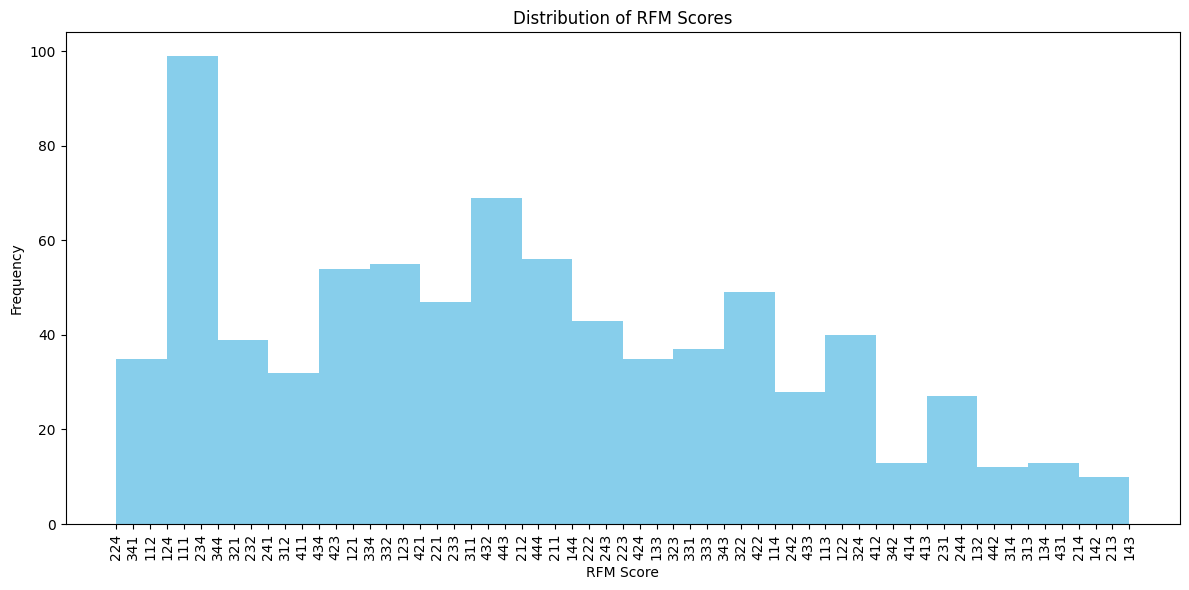

In [29]:
# Extract Recency, Frequency, and Monetary (RFM) features

# Recency: Calculate the number of days since the last purchase for each customer
latest_date = df['Order Date'].max()
recency = df.groupby('Customer ID')['Order Date'].max().reset_index()
recency['Recency'] = (latest_date - recency['Order Date']).dt.days

# Frequency: Count the number of purchases for each customer
frequency = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
frequency.columns = ['Customer ID', 'Frequency']

# Monetary: Sum the total sales for each customer
monetary = df.groupby('Customer ID')['Sales'].sum().reset_index()
monetary.columns = ['Customer ID', 'Monetary']

# Merge Recency, Frequency, and Monetary values into a single DataFrame
rfm = recency.merge(frequency, on='Customer ID').merge(monetary, on='Customer ID')

# Display the RFM values
display(rfm)

# Create RFM Segments
# Recency, Frequency, and Monetary scores: Divide each metric into 4 quantiles and assign a score (1-4)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Calculate the overall RFM Score by combining R, F, and M scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Display the final RFM Segments
display(rfm)

# Print out the top 5 RFM scores
print(rfm.head())

# Visualization: RFM Distribution
plt.figure(figsize=(12, 6))
plt.hist(rfm['RFM_Score'].astype(str), bins=20, color='skyblue')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.title('Distribution of RFM Scores')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Over here we performed distribution of customers by CLV segment**

,Customer ID,CLV
0,AA-10315,126041.644979
1,AA-10375,13295.756807
2,AA-10480,50704.737127
3,AA-10645,96036.478936
4,AB-10015,33459.559451
...,...,...
788,XP-21865,24453.423918
789,YC-21895,123567.508266
790,YS-21880,95156.677643
791,ZC-21910,69931.241618


,Customer ID,CLV,CLV_Segment
0,AA-10315,126041.644979,Top Value
1,AA-10375,13295.756807,Low Value
2,AA-10480,50704.737127,High Value
3,AA-10645,96036.478936,Top Value
4,AB-10015,33459.559451,Medium Value
...,...,...,...
788,XP-21865,24453.423918,Medium Value
789,YC-21895,123567.508266,Top Value
790,YS-21880,95156.677643,Top Value
791,ZC-21910,69931.241618,Top Value


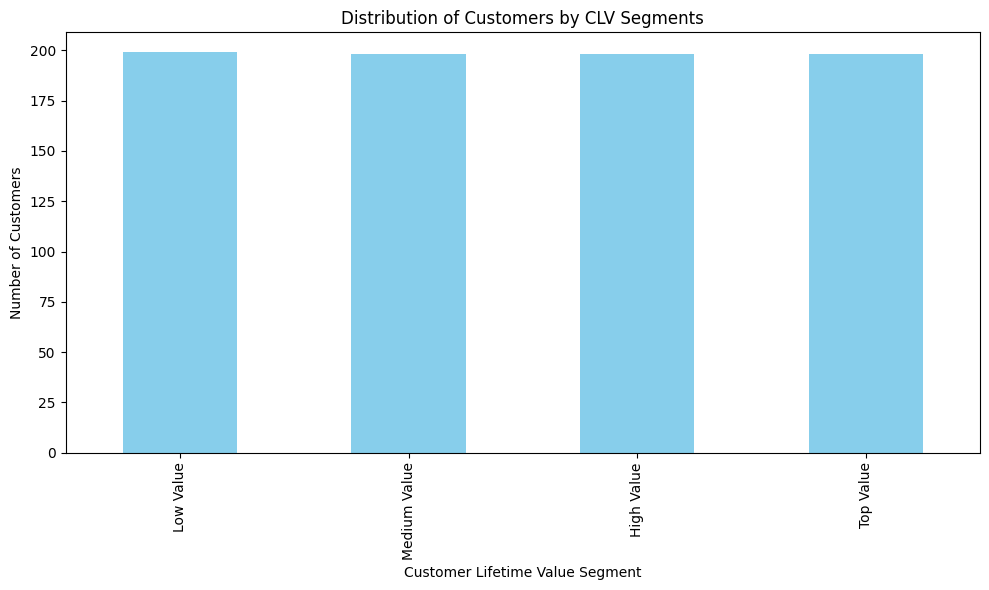

In [30]:
# Average Order Value: Monetary / Frequency for each customer
rfm['Avg_Order_Value'] = rfm['Monetary'] / rfm['Frequency']

# Purchase Frequency: Total number of purchases made by all customers / Total number of unique customers
purchase_frequency = rfm['Frequency'].sum() / rfm.shape[0]

# Churn Rate: Estimate the churn rate by taking the reciprocal of the average customer lifespan
# Assume an average lifespan of 1 year (365 days) for simplicity
churn_rate = 1 / 365

# Gross Margin: Assuming an average margin of 5%
gross_margin = 0.05

# CLV Calculation: CLV = (Average Order Value * Purchase Frequency) / Churn Rate * Gross Margin
rfm['CLV'] = (rfm['Avg_Order_Value'] * purchase_frequency) / churn_rate * gross_margin

# Display the Customer Lifetime Value for each customer
display(rfm[['Customer ID', 'CLV']])

# Segment CLV: Group customers based on their CLV values into different segments
rfm['CLV_Segment'] = pd.qcut(rfm['CLV'], 4, labels=['Low Value', 'Medium Value', 'High Value', 'Top Value'])

# Display the final RFM with CLV segments
display(rfm[['Customer ID', 'CLV', 'CLV_Segment']])

# Visualization: CLV Distribution across Segments
plt.figure(figsize=(10, 6))
rfm['CLV_Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Customer Lifetime Value Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by CLV Segments')
plt.tight_layout()
plt.show()

**Over here i performed total sales by shipping mode and also shipping prefernces for high value customers**

,Ship Mode,Sales
0,First Class,3.455723e+05
1,Same Day,1.252190e+05
2,Second Class,4.499142e+05
3,Standard Class,1.340831e+06


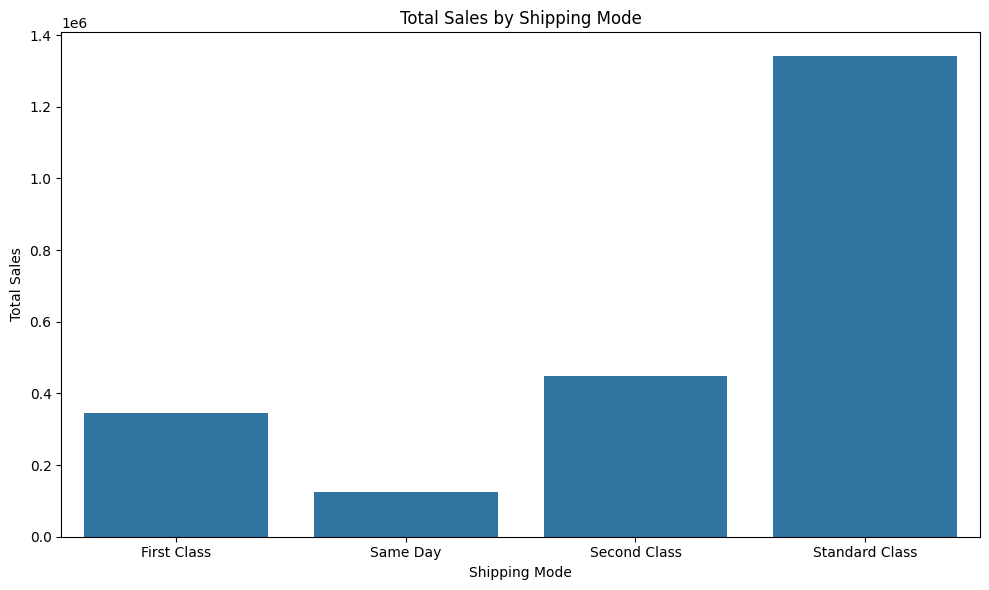

,Ship Mode,Sales
0,First Class,177444.3047
1,Same Day,53473.6280
2,Second Class,218961.3893
3,Standard Class,706541.1698


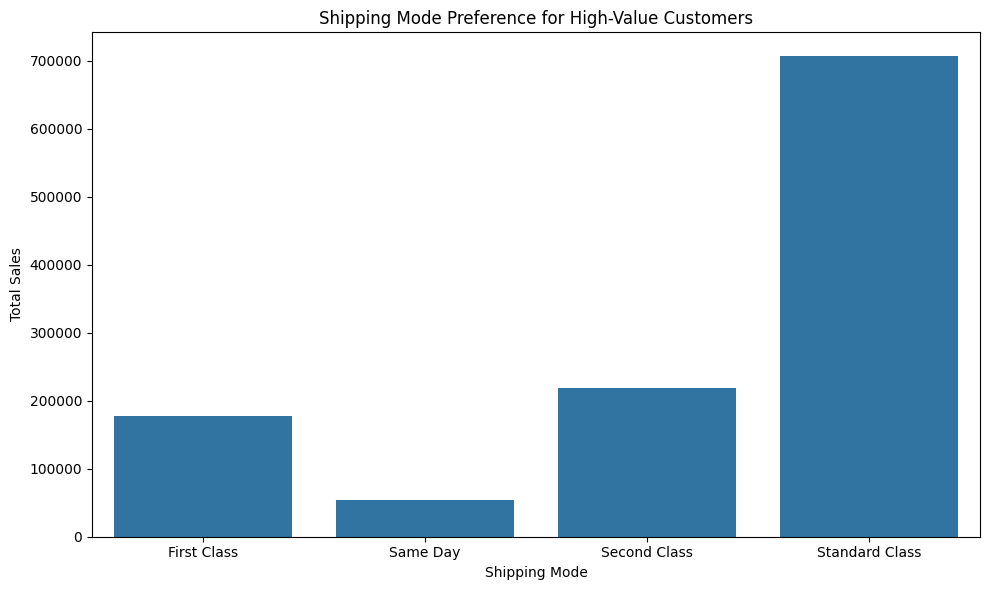

In [31]:
# Analyzing the relationship between different shipping modes and sales

# Group by Shipping Mode to calculate the total sales for each shipping mode
sales_by_shipping_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Display the total sales by shipping mode
display(sales_by_shipping_mode)

# Visualization: Total Sales by Shipping Mode
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_shipping_mode, x='Ship Mode', y='Sales')  # Removed palette to avoid warning
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.title('Total Sales by Shipping Mode')
plt.tight_layout()
plt.show()

# Analyze which shipping mode is preferred by high-value customers

# Define high-value customers based on CLV
high_value_customers = rfm[rfm['CLV_Segment'] == 'Top Value']

# Filter original dataset to include only high-value customers
high_value_data = df[df['Customer ID'].isin(high_value_customers['Customer ID'])]

# Group by Shipping Mode to calculate the total sales for each shipping mode among high-value customers
high_value_sales_by_shipping_mode = high_value_data.groupby('Ship Mode')['Sales'].sum().reset_index()

# Display the total sales by shipping mode for high-value customers
display(high_value_sales_by_shipping_mode)

# Visualization: Shipping Mode Preference for High-Value Customers
plt.figure(figsize=(10, 6))
sns.barplot(data=high_value_sales_by_shipping_mode, x='Ship Mode', y='Sales')  # Removed palette to avoid warning
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.title('Shipping Mode Preference for High-Value Customers')
plt.tight_layout()
plt.show()


**Over here i performed demand forecast for 7 diffrent sub category**

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_153476\1997277637.py:21: FutureWarning: 'M' is deprecated and 

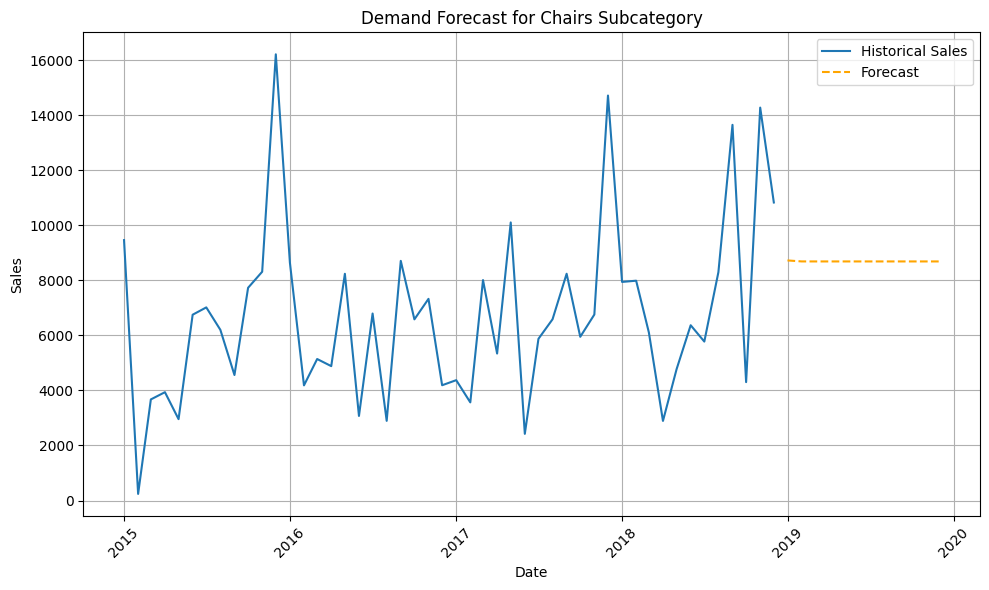

In [39]:
# Filter for 'Chairs' subcategory and aggregate sales by month
df_chairs = df[df['Sub-Category'] == 'Chairs']
df_chairs_monthly = df_chairs.groupby(df_chairs['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Convert 'Order Date' to datetime for time series forecasting
df_chairs_monthly['Order Date'] = df_chairs_monthly['Order Date'].dt.to_timestamp()

# Set 'Order Date' as the index for time series analysis
df_chairs_monthly.set_index('Order Date', inplace=True)

# Fit ARIMA model for forecasting (using p=1, d=1, q=1 as a simple model)
model = ARIMA(df_chairs_monthly['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_chairs_monthly.index, df_chairs_monthly['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df_chairs_monthly.index[-1], periods=12, freq='M'), forecast, label='Forecast', linestyle='--', color='orange')
plt.title('Demand Forecast for Chairs Subcategory')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

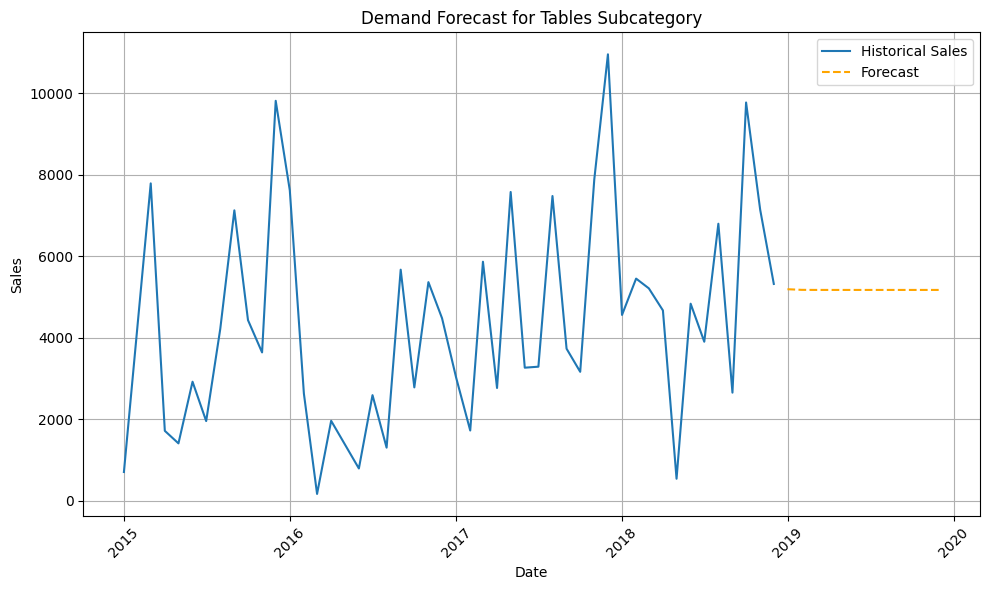

In [41]:
# Forecasting for the "Tables" subcategory
# Filter for 'Tables' subcategory and aggregate sales by month
df_tables = df[df['Sub-Category'] == 'Tables']
df_tables_monthly = df_tables.groupby(df_tables['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Convert 'Order Date' to datetime for time series forecasting
df_tables_monthly['Order Date'] = df_tables_monthly['Order Date'].dt.to_timestamp()

# Set 'Order Date' as the index for time series analysis
df_tables_monthly.set_index('Order Date', inplace=True)

# Fit ARIMA model for forecasting (using p=1, d=1, q=1 as a simple model)
model = ARIMA(df_tables_monthly['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast_tables = model_fit.forecast(steps=12)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_tables_monthly.index, df_tables_monthly['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df_tables_monthly.index[-1], periods=12, freq='M'), forecast_tables, label='Forecast', linestyle='--', color='orange')
plt.title('Demand Forecast for Tables Subcategory')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_153476\355447298.py:22: FutureWarning: 'M' is deprecated and w

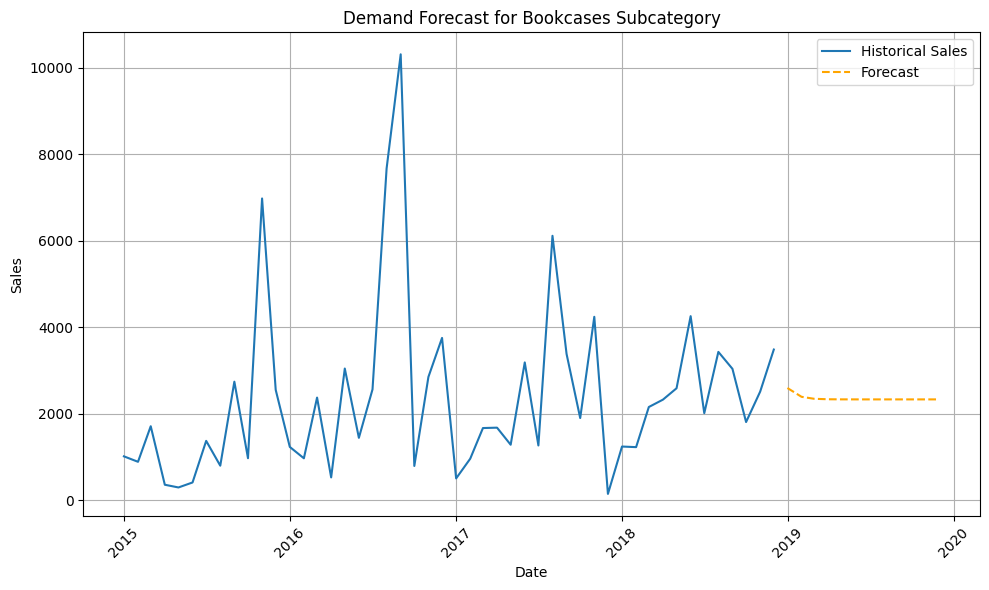

In [42]:
# Forecasting for the "Bookcases" subcategory
# Filter for 'Bookcases' subcategory and aggregate sales by month
df_bookcases = df[df['Sub-Category'] == 'Bookcases']
df_bookcases_monthly = df_bookcases.groupby(df_bookcases['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Convert 'Order Date' to datetime for time series forecasting
df_bookcases_monthly['Order Date'] = df_bookcases_monthly['Order Date'].dt.to_timestamp()

# Set 'Order Date' as the index for time series analysis
df_bookcases_monthly.set_index('Order Date', inplace=True)

# Fit ARIMA model for forecasting (using p=1, d=1, q=1 as a simple model)
model = ARIMA(df_bookcases_monthly['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast_bookcases = model_fit.forecast(steps=12)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_bookcases_monthly.index, df_bookcases_monthly['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df_bookcases_monthly.index[-1], periods=12, freq='M'), forecast_bookcases, label='Forecast', linestyle='--', color='orange')
plt.title('Demand Forecast for Bookcases Subcategory')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_153476\56092525.py:22: FutureWarning: 'M' is deprecated and wi

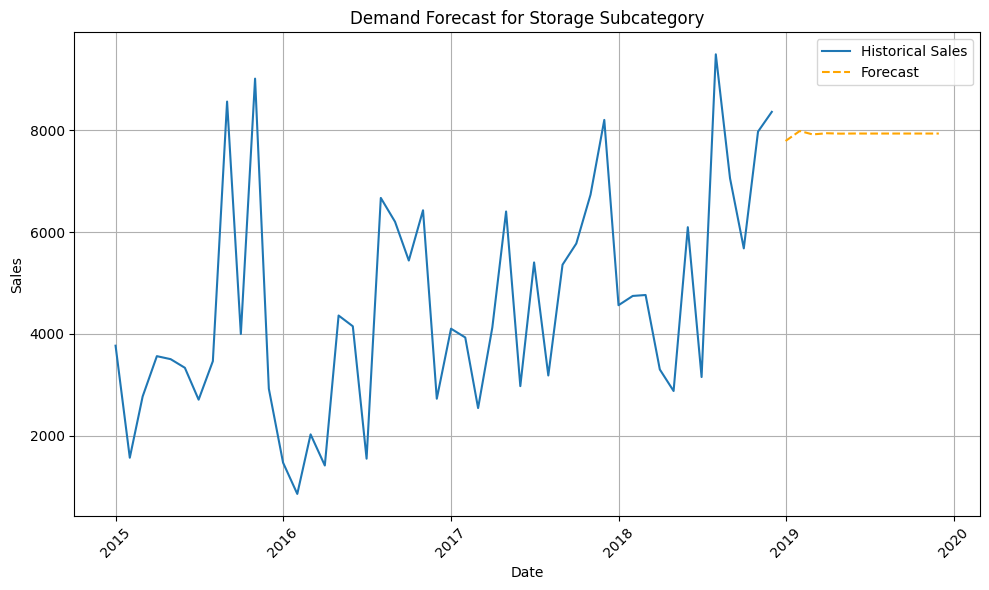

In [43]:
# Forecasting for the "Storage" subcategory
# Filter for 'Storage' subcategory and aggregate sales by month
df_storage = df[df['Sub-Category'] == 'Storage']
df_storage_monthly = df_storage.groupby(df_storage['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Convert 'Order Date' to datetime for time series forecasting
df_storage_monthly['Order Date'] = df_storage_monthly['Order Date'].dt.to_timestamp()

# Set 'Order Date' as the index for time series analysis
df_storage_monthly.set_index('Order Date', inplace=True)

# Fit ARIMA model for forecasting (using p=1, d=1, q=1 as a simple model)
model = ARIMA(df_storage_monthly['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast_storage = model_fit.forecast(steps=12)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_storage_monthly.index, df_storage_monthly['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df_storage_monthly.index[-1], periods=12, freq='M'), forecast_storage, label='Forecast', linestyle='--', color='orange')
plt.title('Demand Forecast for Storage Subcategory')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_153476\4179585669.py:22: FutureWarning: 'M' is deprecated and 

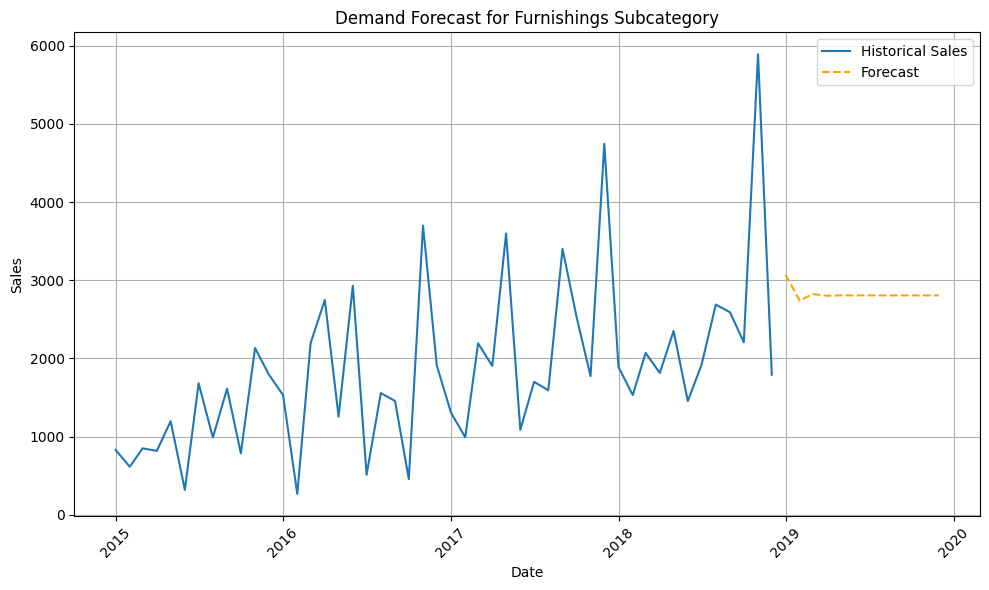

In [44]:
# Forecasting for the "Furnishings" subcategory
# Filter for 'Furnishings' subcategory and aggregate sales by month
df_furnishings = df[df['Sub-Category'] == 'Furnishings']
df_furnishings_monthly = df_furnishings.groupby(df_furnishings['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Convert 'Order Date' to datetime for time series forecasting
df_furnishings_monthly['Order Date'] = df_furnishings_monthly['Order Date'].dt.to_timestamp()

# Set 'Order Date' as the index for time series analysis
df_furnishings_monthly.set_index('Order Date', inplace=True)

# Fit ARIMA model for forecasting (using p=1, d=1, q=1 as a simple model)
model = ARIMA(df_furnishings_monthly['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast_furnishings = model_fit.forecast(steps=12)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_furnishings_monthly.index, df_furnishings_monthly['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df_furnishings_monthly.index[-1], periods=12, freq='M'), forecast_furnishings, label='Forecast', linestyle='--', color='orange')
plt.title('Demand Forecast for Furnishings Subcategory')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

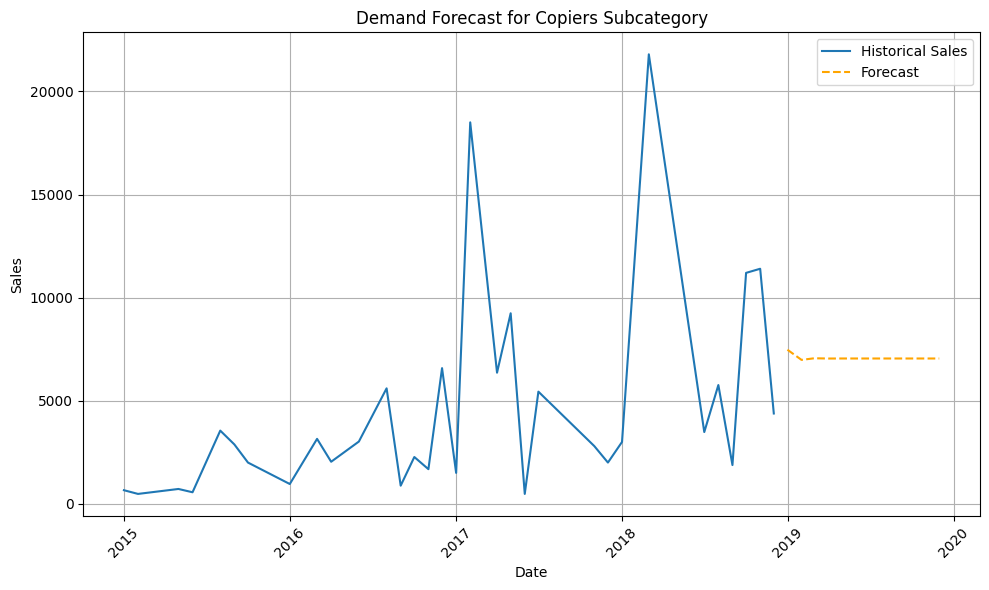

In [45]:
# Forecasting for the "Copiers" subcategory
# Filter for 'Copiers' subcategory and aggregate sales by month
df_copiers = df[df['Sub-Category'] == 'Copiers']
df_copiers_monthly = df_copiers.groupby(df_copiers['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Convert 'Order Date' to datetime for time series forecasting
df_copiers_monthly['Order Date'] = df_copiers_monthly['Order Date'].dt.to_timestamp()

# Set 'Order Date' as the index for time series analysis
df_copiers_monthly.set_index('Order Date', inplace=True)

# Fit ARIMA model for forecasting (using p=1, d=1, q=1 as a simple model)
model = ARIMA(df_copiers_monthly['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast_copiers = model_fit.forecast(steps=12)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_copiers_monthly.index, df_copiers_monthly['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df_copiers_monthly.index[-1], periods=12, freq='M'), forecast_copiers, label='Forecast', linestyle='--', color='orange')
plt.title('Demand Forecast for Copiers Subcategory')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

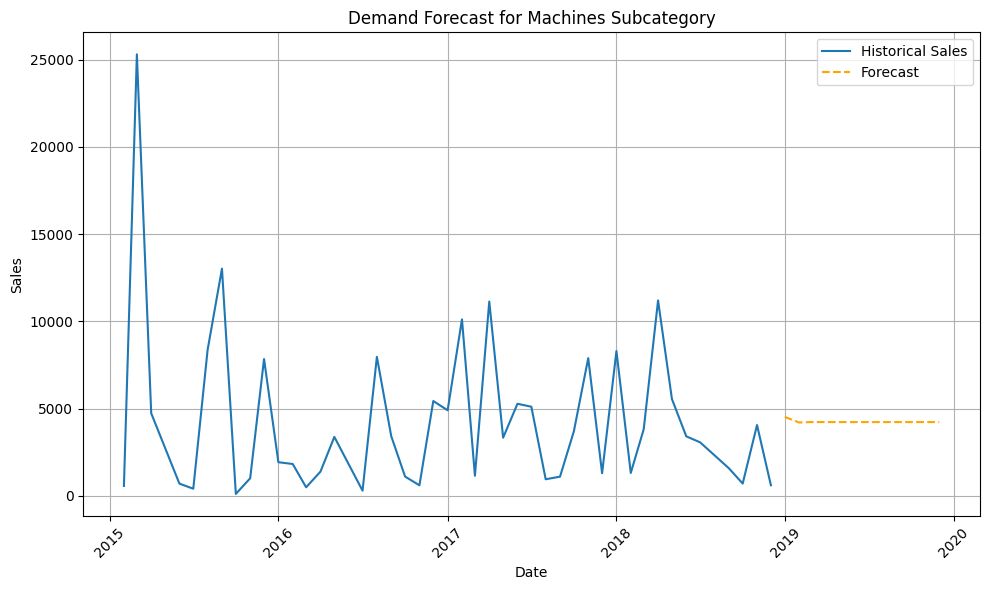

In [46]:
# Forecasting for the "Machines" subcategory
# Filter for 'Machines' subcategory and aggregate sales by month
df_machines = df[df['Sub-Category'] == 'Machines']
df_machines_monthly = df_machines.groupby(df_machines['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Convert 'Order Date' to datetime for time series forecasting
df_machines_monthly['Order Date'] = df_machines_monthly['Order Date'].dt.to_timestamp()

# Set 'Order Date' as the index for time series analysis
df_machines_monthly.set_index('Order Date', inplace=True)

# Fit ARIMA model for forecasting (using p=1, d=1, q=1 as a simple model)
model = ARIMA(df_machines_monthly['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast_machines = model_fit.forecast(steps=12)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_machines_monthly.index, df_machines_monthly['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df_machines_monthly.index[-1], periods=12, freq='M'), forecast_machines, label='Forecast', linestyle='--', color='orange')
plt.title('Demand Forecast for Machines Subcategory')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
